In [37]:
from dotenv import load_dotenv

import os

load_dotenv("env_var.txt")

USER_NAME = os.getenv("USER_NAME")
PASSWORD = os.getenv("PASSWORD")
HOST_AND_PORT = os.getenv("HOST_AND_PORT")
DB_NAME = os.getenv("DB_NAME")

USER_NAME

'dapLearner'

In [3]:
import sqlalchemy as sa
import pandas as pd

# Creat a connection string
db_cnx = sa.create_engine(f"mysql+pymysql://{USER_NAME}:{PASSWORD}@{HOST_AND_PORT}/{DB_NAME}")

db_query = """SHOW TABLES"""
df = pd.read_sql(db_query, db_cnx)
df

#tables = db_cnx.table_names()
#tables

,Tables_in_sakila
0,actor
1,actor_info
2,address
3,category
4,city
5,country
6,customer
7,customer_list
8,film
9,film_actor


In [11]:
call_table = """SELECT * FROM customer"""
read_table = pd.read_sql(call_table, db_cnx) 
read_table

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36,2006-02-15 04:57:20
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36,2006-02-15 04:57:20
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36,2006-02-15 04:57:20
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36,2006-02-15 04:57:20
...,...,...,...,...,...,...,...,...,...
594,595,1,TERRENCE,GUNDERSON,TERRENCE.GUNDERSON@sakilacustomer.org,601,1,2006-02-14 22:04:37,2006-02-15 04:57:20
595,596,1,ENRIQUE,FORSYTHE,ENRIQUE.FORSYTHE@sakilacustomer.org,602,1,2006-02-14 22:04:37,2006-02-15 04:57:20
596,597,1,FREDDIE,DUGGAN,FREDDIE.DUGGAN@sakilacustomer.org,603,1,2006-02-14 22:04:37,2006-02-15 04:57:20
597,598,1,WADE,DELVALLE,WADE.DELVALLE@sakilacustomer.org,604,1,2006-02-14 22:04:37,2006-02-15 04:57:20


In [13]:
amount_table = """SELECT * FROM payment"""
payment_table = pd.read_sql(amount_table, db_cnx) 
payment_table

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,1,76,2.99,2005-05-25 11:30:37,2006-02-15 22:12:30
1,2,1,1,573,0.99,2005-05-28 10:35:23,2006-02-15 22:12:30
2,3,1,1,1185,5.99,2005-06-15 00:54:12,2006-02-15 22:12:30
3,4,1,2,1422,0.99,2005-06-15 18:02:53,2006-02-15 22:12:30
4,5,1,2,1476,9.99,2005-06-15 21:08:46,2006-02-15 22:12:30
...,...,...,...,...,...,...,...
16039,16045,599,1,14599,4.99,2005-08-21 17:43:42,2006-02-15 22:24:12
16040,16046,599,1,14719,1.99,2005-08-21 21:41:57,2006-02-15 22:24:12
16041,16047,599,2,15590,8.99,2005-08-23 06:09:44,2006-02-15 22:24:12
16042,16048,599,2,15719,2.99,2005-08-23 11:08:46,2006-02-15 22:24:13


In [15]:
# 1.Determine how much we made in revenue from active and inactive members. Visualize the result as a bar chart.

query_revenue = """
SELECT 
 CASE WHEN customer.active = 1 
 THEN 'active' ELSE 'inactive'
 END AS member_status,
 SUM(payment.amount) AS total_revenue
FROM
 customer 
JOIN
 payment ON customer.customer_id=payment.customer_id
GROUP BY 
 member_status;   
"""

In [18]:
result = pd.read_sql(query_revenue, db_cnx)
result

,member_status,total_revenue
0,active,65746.60
1,inactive,1659.96


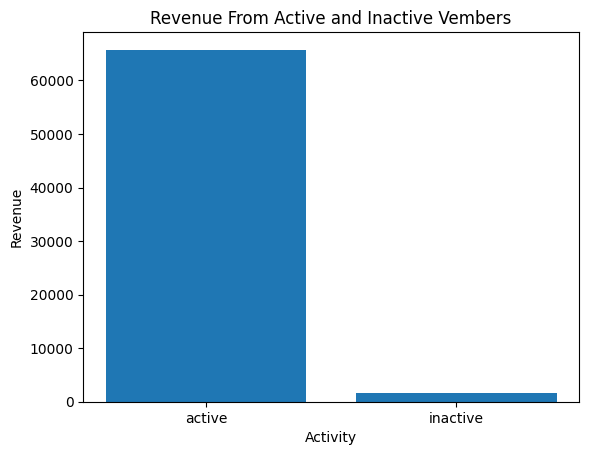

In [41]:
import matplotlib.pyplot as plt

plt.bar(result["member_status"],result["total_revenue"])
plt.title("Revenue From Active and Inactive Vembers")
plt.xlabel("Activity")
plt.ylabel("Revenue")
plt.show()

In [24]:
# 2.We have 2 staff members, Mike and Jon. Determine the staff member that contributed the most to our revenue in the month of August in 2005. Visualize their percentage contribution as a pie chart.

query_staff_revenue ="""
SELECT
 staff.first_name, staff.last_name, SUM(payment.amount) AS total_revenue
FROM
 payment
JOIN
 rental ON payment.rental_id = rental.rental_id
JOIN
 inventory ON rental.inventory_id = inventory.inventory_id
JOIN
 film ON inventory.film_id = film.film_id
JOIN
 staff ON inventory.store_id = staff.store_id
WHERE 
 rental.rental_date BETWEEN '2005-08-01' AND '2005-08-31'
 AND staff.first_name IN ('Mike','Jon')
GROUP BY
 staff.first_name, staff.last_name;       
 
"""

In [25]:
result2 = pd.read_sql(query_staff_revenue, db_cnx)
result2

,first_name,last_name,total_revenue
0,Mike,Hillyer,11933.99
1,Jon,Stephens,12136.15


In [27]:
result2["percentage"] = result2["total_revenue"] / result2["total_revenue"].sum() * 100
result2

,first_name,last_name,total_revenue,percentage
0,Mike,Hillyer,11933.99,49.580061
1,Jon,Stephens,12136.15,50.419939


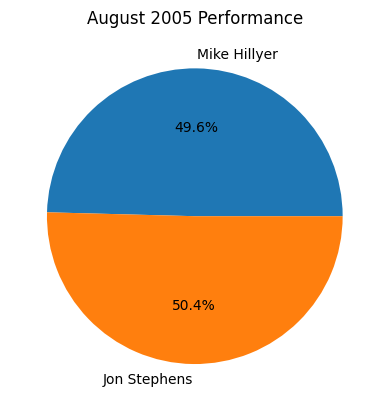

In [42]:
plt.pie(result2["percentage"],autopct="%1.1f%%",labels=result2["first_name"] +' '+ result2["last_name"])
plt.title("August 2005 Performance")
plt.show()

In [31]:
# 3.Create a simple line chart showing the monthly rental count of the store. Do you notice any patterns or trends? 

query_monthly_rentals = """
SELECT
 FORMAT(rental_date, 'yyyy-MM') AS rental_month, COUNT(*) AS rental_count 
FROM
 rental 
GROUP BY FORMAT(rental_date, 'yyyy-MM')
ORDER BY rental_month;

"""

In [34]:
result3 = pd.read_sql(query_monthly_rentals, db_cnx)
result3

,rental_month,rental_count
0,"20,050,524,225,330",1
1,"20,050,524,225,433",1
2,"20,050,524,230,339",1
3,"20,050,524,230,441",1
4,"20,050,524,230,521",1
...,...,...
15810,"20,050,823,222,647",1
15811,"20,050,823,224,248",1
15812,"20,050,823,224,307",1
15813,"20,050,823,225,012",1


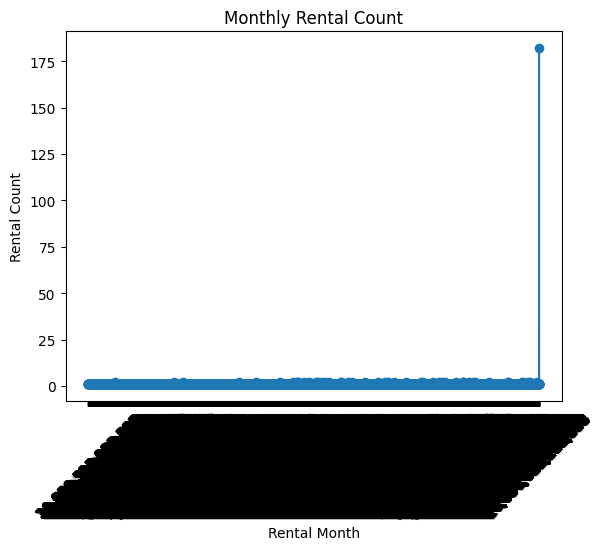

In [46]:
plt.plot(result3["rental_month"], result3["rental_count"], marker="o")
plt.title("Monthly Rental Count")
plt.xlabel("Rental Month")
plt.ylabel("Rental Count")
plt.xticks(rotation=45)
plt.show()

In [35]:
# 4.Create a basic bar chart to show the monthly revenue for the rental store.

query_monthly_revenue = """
SELECT
 FORMAT(rental_date, 'yyyy-MM') AS rental_month, SUM(payment.amount) AS total_revenue 
FROM
 rental
JOIN
 payment ON rental.rental_id = payment.rental_id  
GROUP BY FORMAT(rental_date, 'yyyy-MM')
ORDER BY rental_month;
"""

In [38]:
result4 = pd.read_sql(query_monthly_revenue, db_cnx)
result4

,rental_month,total_revenue
0,"20,050,524,225,330",2.99
1,"20,050,524,225,433",2.99
2,"20,050,524,230,339",3.99
3,"20,050,524,230,441",4.99
4,"20,050,524,230,521",6.99
...,...,...
15810,"20,050,823,222,647",0.99
15811,"20,050,823,224,248",0.99
15812,"20,050,823,224,307",8.99
15813,"20,050,823,225,012",3.99


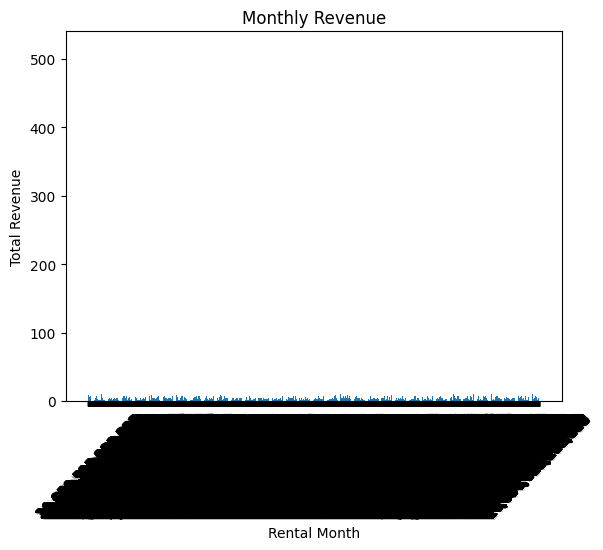

In [45]:
plt.bar(result4["rental_month"], result4["total_revenue"])
plt.title("Monthly Revenue")
plt.xlabel("Rental Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

In [8]:
read_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   actor_id     200 non-null    int64         
 1   first_name   200 non-null    object        
 2   last_name    200 non-null    object        
 3   last_update  200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.4+ KB
